# Structure de bandes électronique du ScNiP

In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure import plotter
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure import bandstructure
import numpy as np
import matplotlib.pyplot as plt

In [19]:
print("debut du télechergement")
with MPRester("HyfUIH7nOGea4sWi3HeF3B4Yjjv5SgwQ") as m:
    band = m.get_bandstructure_by_material_id("mp-961675")
print("téléchargement terminé")

debut du télechergement


Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

téléchargement terminé


# Bande interdite

In [3]:
band_gap = band.get_band_gap()


if band_gap['direct']==True:
    direct = "direct"
else:
    direct="indirecte"
    

energy = band_gap['energy']


transition = band_gap['transition']

print("La bande d'énergie est " + str(direct))
print("Energie de la bande interdite : " + str(energy) + " eV")
print("Direction du vecteur de transition : " + str(transition))

La bande d'énergie est indirecte
Energie de la bande interdite : 0.5921000000000003 eV
Direction du vecteur de transition : \Gamma-(0.471,0.000,0.471)


<Axes: xlabel='$\\mathrm{Wave\\ Vector}$', ylabel='$\\mathrm{E\\ -\\ E_f\\ (eV)}$'>

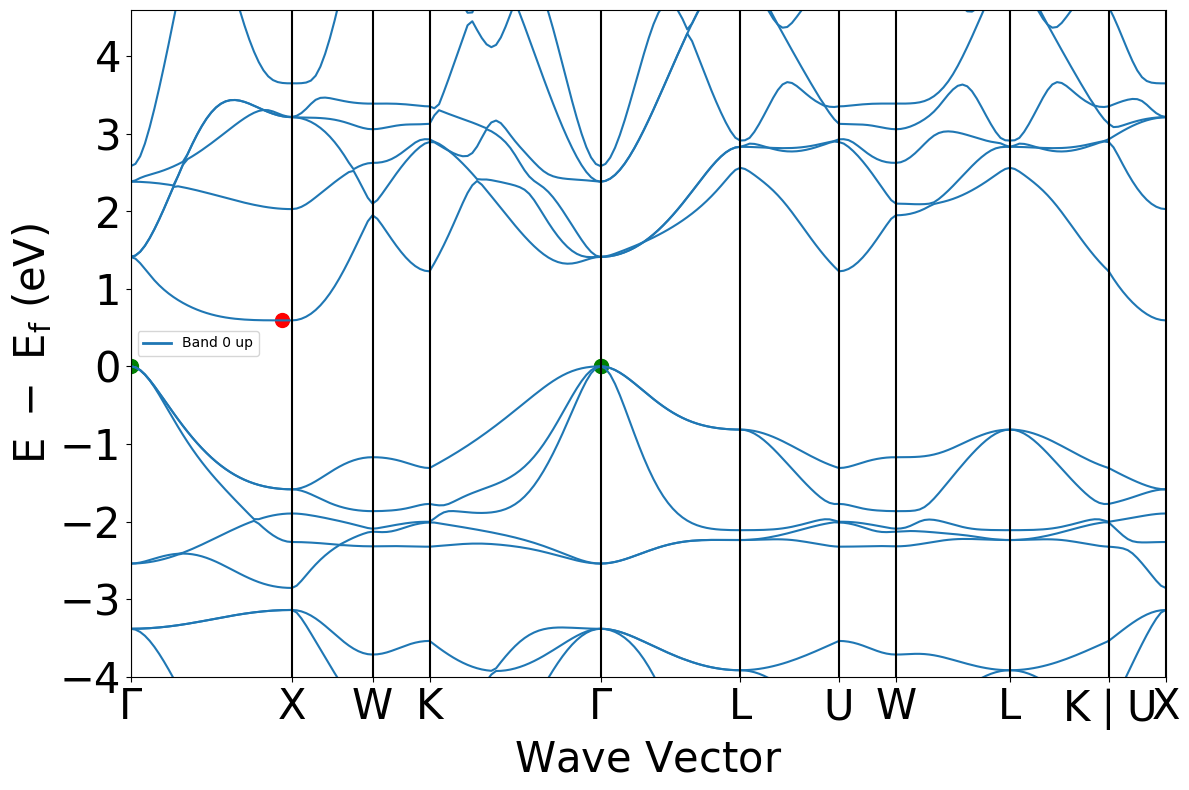

In [4]:
bs = BSPlotter(band)
bs.get_plot(vbm_cbm_marker=True)

Conclusions : 

Le ScNiP a une bande interdite indirecte. On observe que les maximas de la bande de valence(en verts) ne sont pas allignés au minima de la bande de conduction (en rouge). La Transition se fait en Γ-X.

Ayant une bande interdite indirecte avec une énergie de 0.5921 eV,qui est trop faible pour un isolant, on en conclu que le matériel est semi conducteur.

# Dispersion

In [18]:
#Récupération des données sur les bandes de valence et conduction
data = bs.bs_plot_data()

#vbm = bande de valance et cbm= bande de conduction
vbm = band.get_vbm()
cbm = band.get_cbm()

print("index des bandes de valences avec maximum" +str(vbm['band_index']))
print("index de la bande de conduction avec un minimum" + str(cbm['band_index']))

print("\n")
print("La dernière bande de valence : 15")
print("energie du vbm: "+str(vbm.get('energy')) + "eV" )

print("\n")
print("La première bande de conduction : 16")
print("energie du cbm: "+str(cbm.get('energy')) + "eV" )
print("\n")
print("on retrouve bien l'énergie de la bande interdite en soustrayant les 2 :" +str((cbm.get('energy')-(vbm.get('energy'))))+" eV")

index des bandes de valences avec maximumdefaultdict(<class 'list'>, {<Spin.up: 1>: [13, 14, 15]})
index de la bande de conduction avec un minimumdefaultdict(<class 'list'>, {<Spin.up: 1>: [16]})


La dernière bande de valence : 15
energie du vbm: 6.9307eV


La première bande de conduction : 16
energie du cbm: 7.5228eV


on retrouve bien l'énergie de la bande interdite en soustrayant les 2 :0.5921000000000003 eV


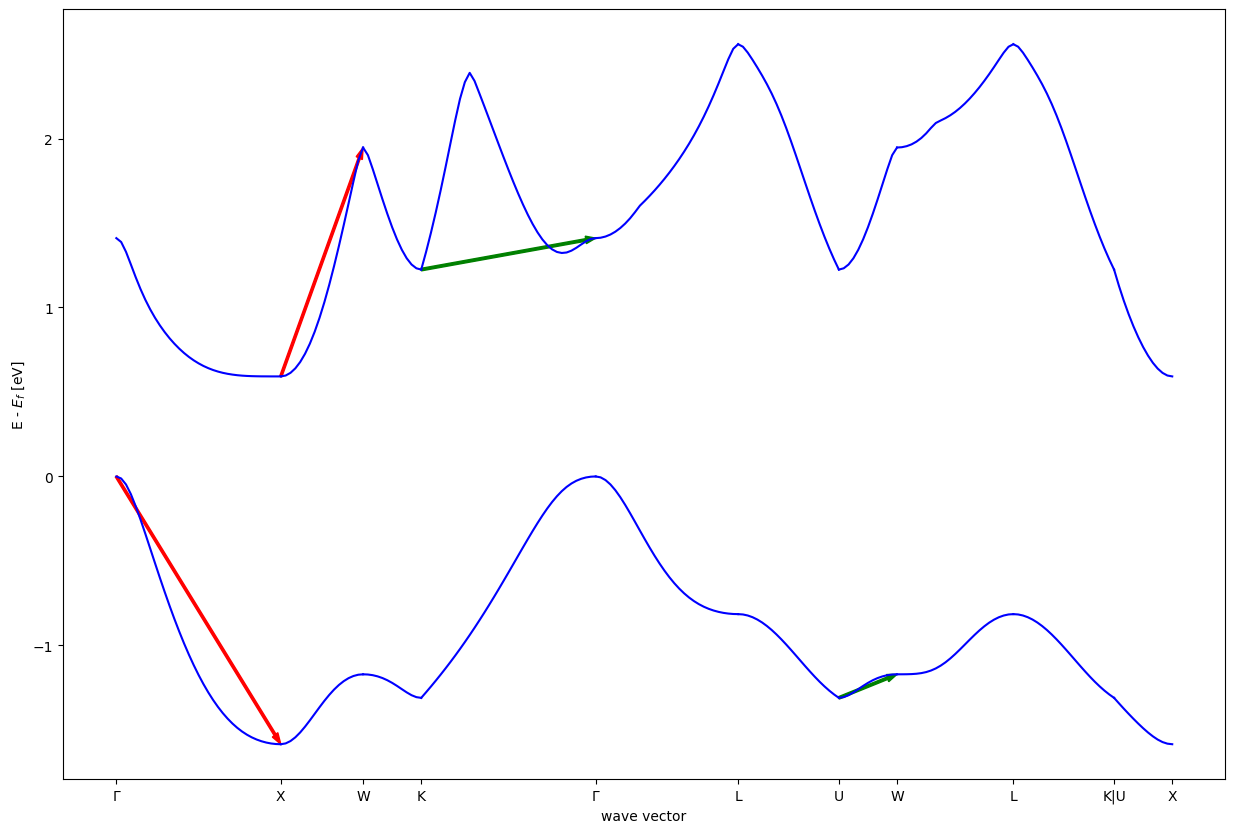

In [21]:
#Affichage de la dispersion

distance = data.get('distances')
energy = data.get('energy')

def slope(x,y):
    slope = abs(y[-1]-y[0])/(x[-1]-x[0])
    return np.array([slope,x[0],y[0],x[-1]-x[0],y[-1]-y[0]])

slope_val = np.zeros((len(distance), 5))
slope_con = np.zeros((len(distance), 5))

for i in range(len(distance)):
    slope_val[i] = slope(distance[i], energy["1"][i][15])
    slope_con[i] = slope(distance[i], energy["1"][i][16])

val_slopes = slope_val.T
con_slopes = slope_con.T

max_val = np.argmax(val_slopes[0])
min_val = np.argmin(val_slopes[0])
max_con = np.argmax(con_slopes[0]) 
min_con = np.argmin(con_slopes[0])

figure,axes = plt.subplots(1,1,figsize=(15,10))

for i in range(len(distance)):
    plt.plot(distance[i],energy['1'][i][15],'b')
    plt.plot(distance[i],energy['1'][i][16],'b')
    
for i in range(len(data.get("vbm"))):
    x, y= data.get("vbm")[i]
    plt.plot(x,y,markersize=10)
for i in range(len(data.get("cbm"))):
    x, y = data.get("cbm")[i]
    plt.plot(x,y,markersize=10)
dts=[]    
for i in range(len(distance)):
    dts.append(distance[i][0])
dts.append(7.10830014)
plt.arrow(val_slopes[1][max_val], val_slopes[2][max_val], val_slopes[3][max_val], val_slopes[4][max_val], color='red', width=0.015, length_includes_head=True)
plt.arrow(val_slopes[1][min_val], val_slopes[2][min_val], val_slopes[3][min_val], val_slopes[4][min_val], color='green', width=0.015, length_includes_head=True)
plt.arrow(con_slopes[1][max_con], con_slopes[2][max_con], con_slopes[3][max_con], con_slopes[4][max_con], color='red', width=0.015, length_includes_head=True)
plt.arrow(con_slopes[1][min_con], con_slopes[2][min_con], con_slopes[3][min_con], con_slopes[4][min_con], color='green', width=0.015, length_includes_head=True)

axes.set_xticks(dts)
axes.set_xticklabels(['Γ','X',"W",'K','Γ',"L",'U','W',"L",'K|U','X'])
axes.set_xlabel("wave vector")
axes.set_ylabel("E - $E_{f}$ [eV]")

plt.show()

Les flêches rouges representent la dispersion maximales et les flêches vertes la dispersion minimale.

Dispersion maximale et minimale:
- Dispersion maximale pour la bande de valence :Γ-X .
- Dispersion minimale pour la bande de valence :U-W .
- Dispersion maximale pour la bande de conduction :X-W .
- Dispersion minimale pour la bande de conduction :K-Γ .

# Masse effective

La masse effective s'obtient comme tel : m* = ℏ^2/ (∂^2E/∂k^2)

In [22]:
#Constante hbar
h_bar = 6.582119570 * 1e-16 # en eV

vbm = data.get('vbm')
cbm = data.get('cbm')

#Interpolation pour la bande de valence
k_val = np.zeros(3)
k_val[1] = vbm[0][0]
k_val[0] = distance[0][-2]
k_val[2] = distance[1][2]

e_val = np.zeros(3)
e_val[1] = vbm[0][1]
e_val[0] = energy.get('1')[0][15][-2]#les indices sont pour la pente max
e_val[2] = energy.get('1')[1][15][2]

interpolation_val = np.polyfit(k_val,e_val,2)

#Calcul de la masse effective
m_val = (vbm[0][0])**2 * (h_bar**2 / (2*interpolation_val[0]))

#Interpolation pour la bande de conduction
k_con = np.zeros(3)
k_con[1] = cbm[0][0]
k_con[0] = distance[1][-2]
k_con[2] = distance[2][2]

e_con = np.zeros(3)
e_con[1] = cbm[0][1]
e_con[0] = energy.get('1')[1][16][-2]#les indices sont pour la pente max
e_con[2] = energy.get('1')[2][16][2]

interpolation_con = np.polyfit(k_con,e_con,2)

m_con = (cbm[0][0])**2 * (h_bar**2 / (2*interpolation_con[0]))

#Résultats
print("La masse effective pour la bande de valence est " + str(m_val) + " kg")
print("\n")
print("La masse effective pour la bande de conduction est " + str(m_con) + " kg")

La masse effective pour la bande de valence est 0.0 kg


La masse effective pour la bande de conduction est -5.98522860437094e-32 kg
